## KIDNEY DISEASE CLASSIFICATION

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing & Reading the File

In [2]:
data = pd.read_csv('kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## Exploratory Data Analysis

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
data.shape

(400, 26)

### Changing the Columns name 

In [9]:
columns = pd.read_csv('data_description (1).txt', sep = '-')
columns

,1. Features:
id,id
age,age
bp,blood pressure
sg,specific gravity
al,albumin
su,sugar
rbc,rbc
pc,pus cells
pcc,pus cell clumps
ba,bacteria


In [10]:
columns = columns.reset_index()
columns

,index,1. Features:
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,rbc
7,pc,pus cells
8,pcc,pus cell clumps
9,ba,bacteria


In [11]:
columns.columns = ['cols','abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,rbc
7,pc,pus cells
8,pcc,pus cell clumps
9,ba,bacteria


In [12]:
data.columns = columns['abb_col_names'].values
data

,id,age,blood pressure,specific gravity,albumin,sugar,rbc,pus cells,pus cell clumps,bacteria,...,packed cell volume,wbc count,rbc count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anaemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [13]:
data.drop(["id"], axis = 1, inplace = True)
data

,age,blood pressure,specific gravity,albumin,sugar,rbc,pus cells,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,wbc count,rbc count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


### Changing the Datatypes for particular columns

In [14]:
data.dtypes

age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
rbc                         object
pus cells                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
wbc count                   object
rbc count                   object
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anaemia                     object
class                       object
dtype: object

In [15]:
def convert_dtype(data, feature):
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

In [16]:
features = ['rbc count','packed cell volume','wbc count']

In [17]:
for i in features:
    convert_dtype(data,i)

In [18]:
data.dtypes

age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
rbc                         object
pus cells                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
wbc count                  float64
rbc count                  float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anaemia                     object
class                       object
dtype: object

### Splitting the categorical and numerical columns 

In [19]:
def extract_cat_num(data):
    cat_col = [col for col in data.columns if data[col].dtype == 'object']
    num_col = [col for col in data.columns if data[col].dtype != 'object']
    return cat_col,num_col

In [20]:
cat_col,num_col = extract_cat_num(data)

In [21]:
cat_col

['rbc',
 'pus cells',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anaemia',
 'class']

In [22]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'wbc count',
 'rbc count']

### Checking for incorrect values and replacing them

In [23]:
for col in cat_col:
    print('{} has {} values '.format(col,data[col].unique()))
    print('\n')

rbc has [nan 'normal' 'abnormal'] values 


pus cells has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


hypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anaemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [24]:
data['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},
                                  inplace = True)

data['coronary artery disease'] = data['coronary artery disease'].replace(to_replace = '\tno', value = 'no')

data['class'] = data['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [25]:
for col in cat_col:
    print('{} has {} values  '.format(col, data[col].unique()))
    print('\n')

rbc has [nan 'normal' 'abnormal'] values  


pus cells has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


hypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anaemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




## Data Cleaning 

### Checking for Na values

In [26]:
data.isna().sum().sort_values(ascending = False)

rbc                        152
rbc count                  131
wbc count                  106
potassium                   88
sodium                      87
packed cell volume          71
pus cells                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
anaemia                      1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

In [27]:
df = data.copy()
df

,age,blood pressure,specific gravity,albumin,sugar,rbc,pus cells,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,wbc count,rbc count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


### Creating Functions for removing Na values from categorical and Numerical columns

In [28]:
def Random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum())               
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] = random_sample

In [29]:
random_sample = df["rbc"].dropna().sample(df["rbc"].isnull().sum()) 
random_sample

107      normal
307      normal
196    abnormal
393      normal
319      normal
         ...   
299      normal
74     abnormal
38     abnormal
288      normal
380      normal
Name: rbc, Length: 152, dtype: object

In [30]:
random_sample.index = df[df["rbc"].isnull()].index


In [31]:
df[cat_col].isnull().sum()

rbc                        152
pus cells                   65
pus cell clumps              4
bacteria                     4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anaemia                      1
class                        0
dtype: int64

In [32]:
Random_value_imputation('pus cells')
Random_value_imputation('rbc')

In [33]:
df[cat_col].isnull().sum()

rbc                        0
pus cells                  0
pus cell clumps            4
bacteria                   4
hypertension               2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anaemia                    1
class                      0
dtype: int64

In [34]:
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [35]:
for col in cat_col:
    impute_mode(col)

In [36]:
df[cat_col].isnull().sum()

rbc                        0
pus cells                  0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anaemia                    0
class                      0
dtype: int64

In [37]:
df[num_col].isnull().sum()

age                       9
blood pressure           12
specific gravity         47
albumin                  46
sugar                    49
blood glucose random     44
blood urea               19
serum creatinine         17
sodium                   87
potassium                88
haemoglobin              52
packed cell volume       71
wbc count               106
rbc count               131
dtype: int64

In [38]:
for col in num_col:
    Random_value_imputation(col)

In [39]:
df[num_col].isnull().sum()

age                     0
blood pressure          0
specific gravity        0
albumin                 0
sugar                   0
blood glucose random    0
blood urea              0
serum creatinine        0
sodium                  0
potassium               0
haemoglobin             0
packed cell volume      0
wbc count               0
rbc count               0
dtype: int64

In [40]:
df.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
rbc                        0
pus cells                  0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
wbc count                  0
rbc count                  0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anaemia                    0
class                      0
dtype: int64

## Data Visualization

### Displaying Feature Distribution for both Categorical and Numerical Columns

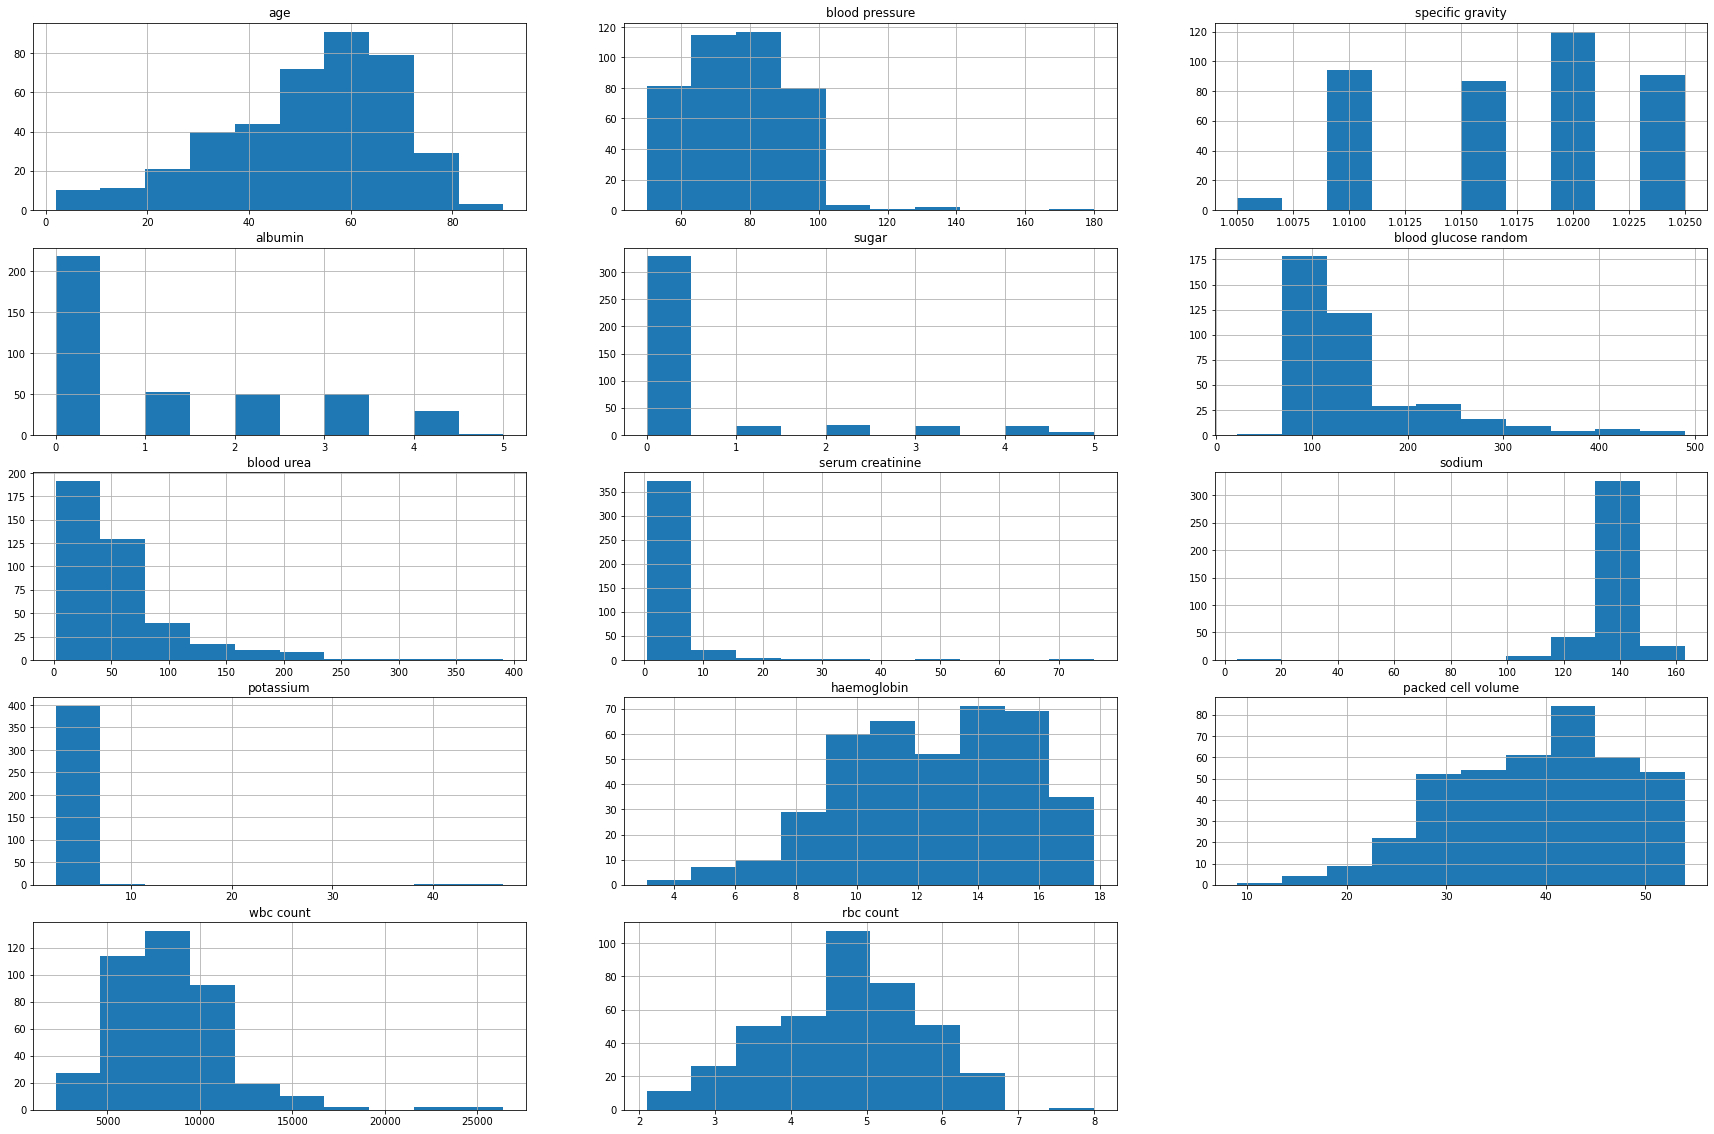

In [41]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

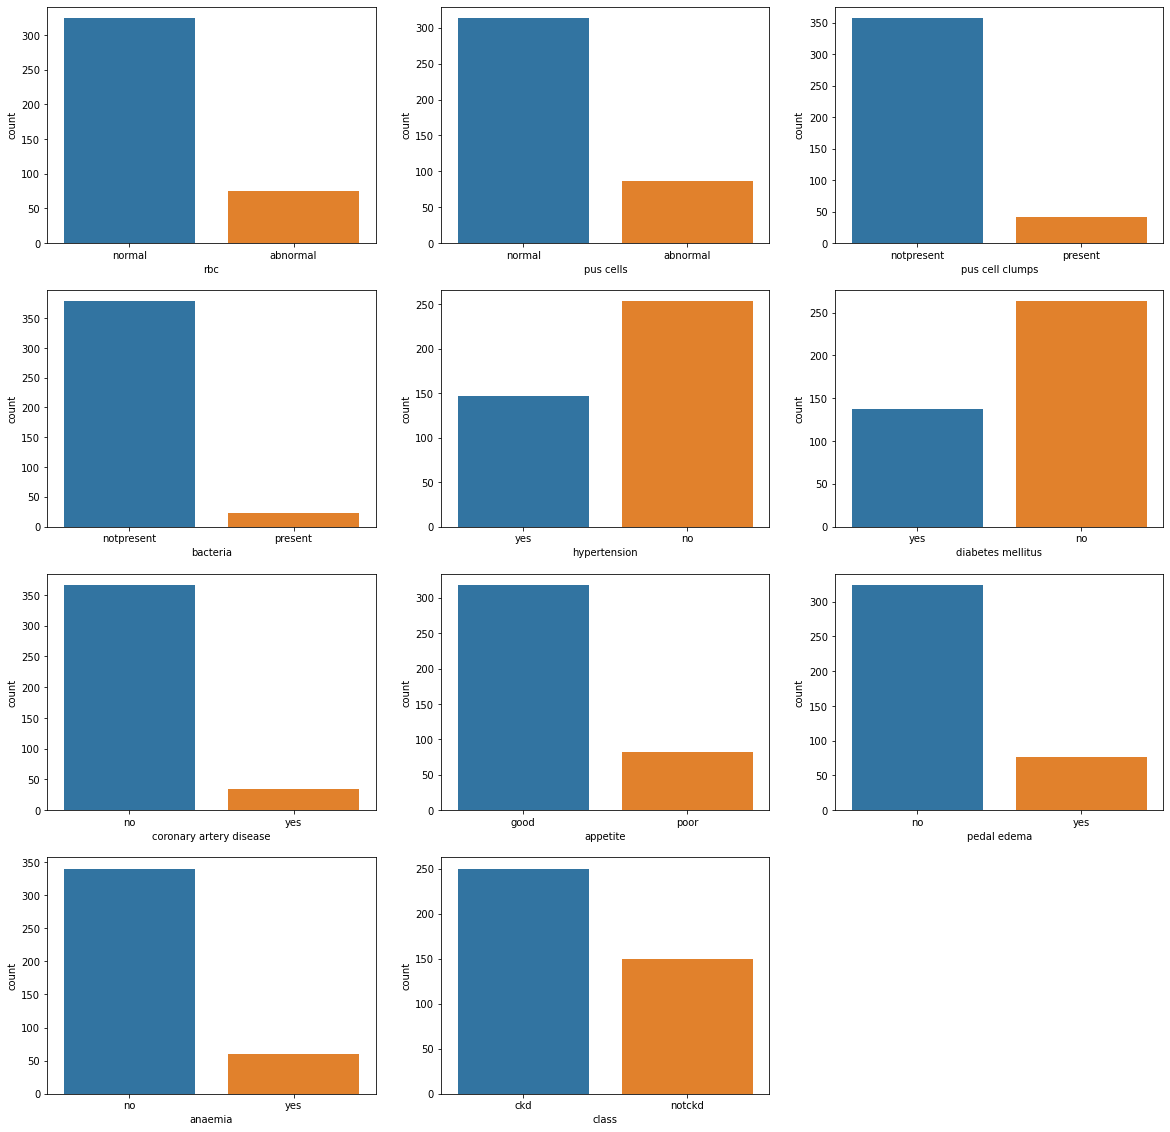

In [42]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

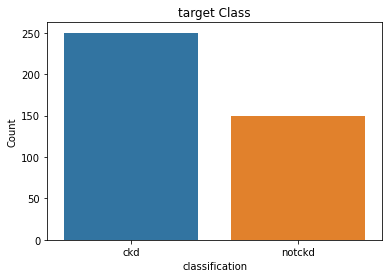

In [43]:
sns.countplot(x='class',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

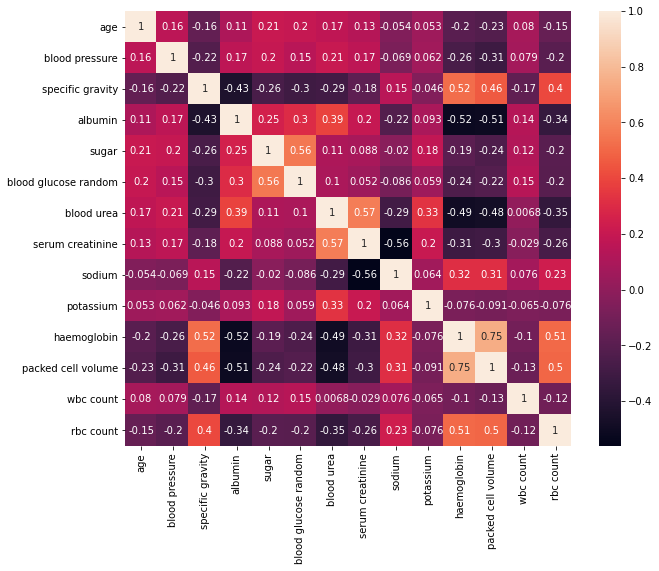

In [44]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

### Visualization for variables with strong correlation

In [45]:
# Defining violin, scatter plot & kde_plot functions
def violin(col):
    sns.violinplot(x = "class", y = col, data = df, box = True)

def scatters(col1,col2):
    sns.scatterplot(x = col1, y = col2, data = df, hue = "class")
    plt.show()
    
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue = "class",aspect = 2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

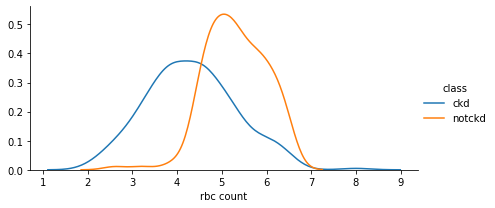

In [46]:
kde_plot('rbc count')

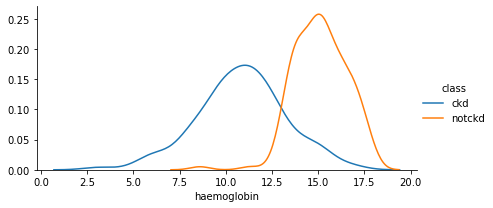

In [47]:
kde_plot('haemoglobin')

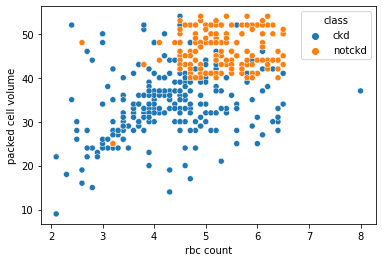

In [48]:
scatters('rbc count', 'packed cell volume')

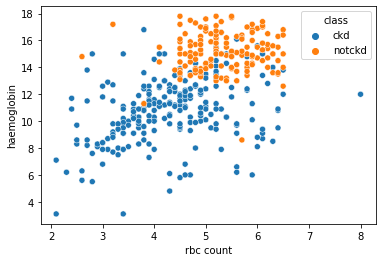

In [49]:
scatters('rbc count', 'haemoglobin')

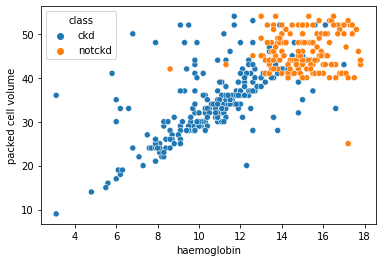

In [50]:
scatters('haemoglobin','packed cell volume')

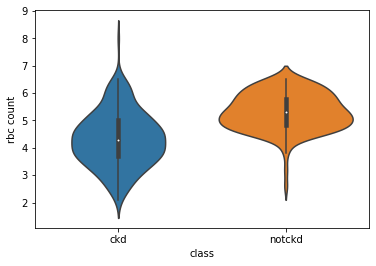

In [51]:
violin('rbc count')

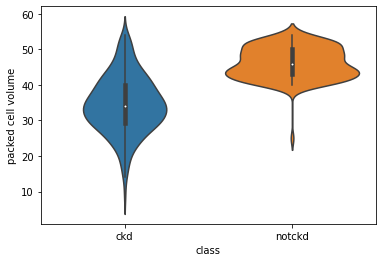

In [52]:
violin('packed cell volume')

### Visualization for variables with weak correlation

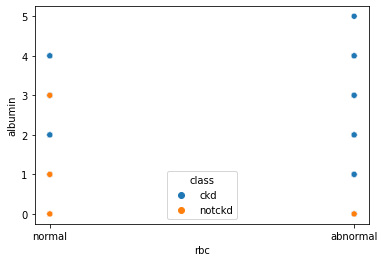

In [53]:
scatters('rbc','albumin')

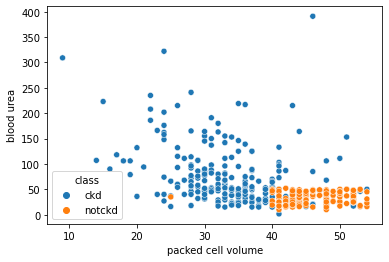

In [54]:
scatters('packed cell volume','blood urea')

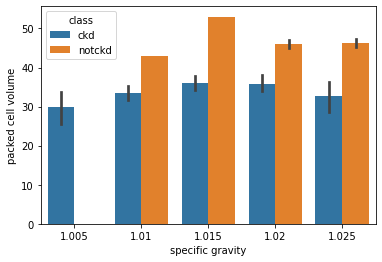

In [55]:
sns.barplot(x = "specific gravity", y = "packed cell volume", hue = 'class', data = df)
plt.show()

## Features Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [58]:
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [59]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,rbc,pus cells,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,wbc count,rbc count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,308.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


## Feature Importance

In [60]:
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [61]:
ind_col=[col for col in df.columns if col!='class']
dep_col='class'

In [62]:
X=df[ind_col]
y=df[dep_col]

In [63]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [64]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x0000015F591355E0>)

In [65]:
ordered_feature.scores_

array([1.15438053e+02, 8.51313065e+01, 5.58705196e-03, 2.38052167e+02,
       1.13400000e+02, 9.65928205e+00, 1.32696391e+01, 2.52000000e+01,
       1.32000000e+01, 2.27006534e+03, 2.49237347e+03, 3.58204332e+02,
       2.67394011e+01, 2.92525978e+00, 1.37200715e+02, 3.23584255e+02,
       1.01751019e+04, 1.98149569e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [66]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,115.438053
1,85.131307
2,0.005587
3,238.052167
4,113.400000
5,9.659282
6,13.269639
7,25.200000
8,13.200000
9,2270.065336


In [67]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,rbc
6,pus cells
7,pus cell clumps
8,bacteria
9,blood glucose random


In [68]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [69]:
features_rank

,0,Score
0,age,115.438053
1,blood pressure,85.131307
2,specific gravity,0.005587
3,albumin,238.052167
4,sugar,113.400000
5,rbc,9.659282
6,pus cells,13.269639
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2270.065336


In [70]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,115.438053
1,blood pressure,85.131307
2,specific gravity,0.005587
3,albumin,238.052167
4,sugar,113.400000
5,rbc,9.659282
6,pus cells,13.269639
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2270.065336


In [71]:
features_rank.nlargest(10,'Score')

,Features,Score
16,wbc count,10175.101896
10,blood urea,2492.373467
9,blood glucose random,2270.065336
11,serum creatinine,358.204332
15,packed cell volume,323.584255
3,albumin,238.052167
14,haemoglobin,137.200715
0,age,115.438053
4,sugar,113.400000
18,hypertension,88.200000


In [72]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values #in array form
selected_columns

array(['wbc count', 'blood urea', 'blood glucose random',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'hypertension'], dtype=object)

In [73]:
X_new=data[selected_columns]

## Model Building

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [75]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [76]:
y_train.value_counts()

0    187
1    113
Name: class, dtype: int64

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [79]:
from xgboost import XGBClassifier
classifier =  XGBClassifier()

In [80]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,
                                 scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [81]:
random_search.fit(X_train._get_numeric_data(), y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[19:19:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    4.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.6s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [82]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [83]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [84]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [85]:
classifier.fit(X_train._get_numeric_data(),y_train)

[19:19:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [86]:
y_pred=classifier.predict(X_test._get_numeric_data())
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

#### Evaluation metrics

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [88]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[62  1]
 [ 1 36]]


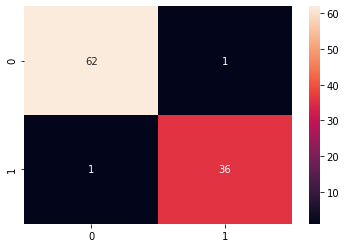

In [89]:
sns.heatmap(confusion,annot = True)
plt.show()

In [90]:
accuracy_score(y_test, y_pred)

0.98